In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Dhaka Rent.csv")

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [5]:
df.head(7)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000


In [6]:
df.area.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [7]:
df['rent'].head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [8]:
df[5:6]

,area,rent
5,1900,32500


In [9]:
df[5:10]

,area,rent
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [10]:
df.mean()

area     2289.000000
rent    37269.166667
dtype: float64

In [11]:
df.area.mean()

2289.0

In [12]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [13]:
df.area.std()

538.8805093801691

In [14]:
df.shape

(60, 2)

In [15]:
row, col = df.shape

In [16]:
row

60

In [17]:
col

2

In [18]:
df.isnull().sum()

area    0
rent    0
dtype: int64

# Vizualisation

Text(0.5, 1.0, 'Rent Plot')

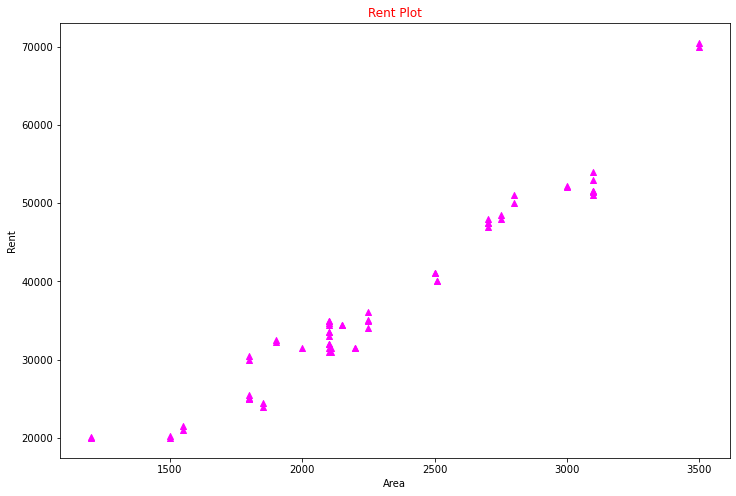

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(df.area, df.rent, marker='^',color='#FF00FF')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Rent Plot', color='red')

In [20]:
x = df[['area']]    #single dim not allowed
y = df['rent']

In [21]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


# Split the dataset into train and test

In [22]:
 from sklearn.model_selection import train_test_split as tts

In [23]:
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [24]:
xtrain.head()

,area
48,1800
35,1900
26,2750
39,2100
55,3100


In [25]:
ytrain.head()

48    25500
35    32300
26    48000
39    31500
55    54000
Name: rent, dtype: int64

# Liner Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(xtrain, ytrain)  #training

LinearRegression()

In [29]:
m = reg.coef_
m

array([20.68657377])

In [30]:
c = reg.intercept_
c

-10275.498308594812

In [31]:
x1 = 2100
y = m * x1 + c

In [32]:
y

array([33166.30660101])

In [33]:
reg.predict([[2100]])

array([33166.30660101])

In [34]:
pred = reg.predict(xtest)

In [35]:
pred

array([33166.30660101, 21788.69102945, 47646.90823754, 29028.99184771,
       35234.96397766, 62127.50987408, 33166.30660101, 33166.30660101,
       33166.30660101, 51784.22299084, 45578.2508609 , 33166.30660101,
       46612.57954922, 20754.36234112, 53852.88036749, 33166.30660101,
       31097.64922436, 36269.29266598])

In [36]:
df['predicted result'] = reg.predict(x)

In [37]:
df.head()

,area,rent,predicted result
0,2000,31500,31097.649224
1,2100,35000,33166.306601
2,2500,41050,41440.936108
3,2250,36100,36269.292666
4,3000,52100,51784.222991


In [38]:
x1 = 2100
y = m * x1 + c
y

array([33166.30660101])

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
mse = mean_squared_error(ytest, pred)

In [41]:
mse

6983961.526525784

In [42]:
mae = mean_absolute_error(ytest, pred)

In [43]:
mae

1818.4146997235553

# Best fit line

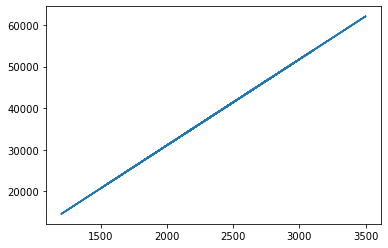

In [44]:
plt.plot(df.area, reg.predict(df[['area']]))

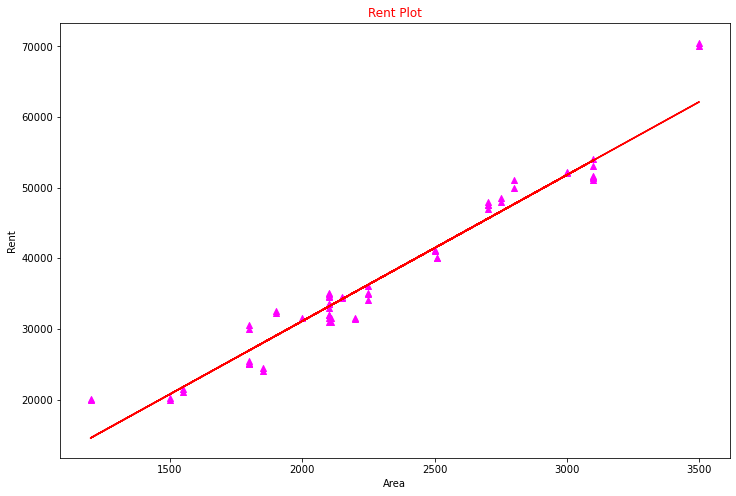

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(df.area, df.rent, marker='^',color='#FF00FF')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Rent Plot', color='red')
plt.plot(xtrain, reg.predict(xtrain), color='red')

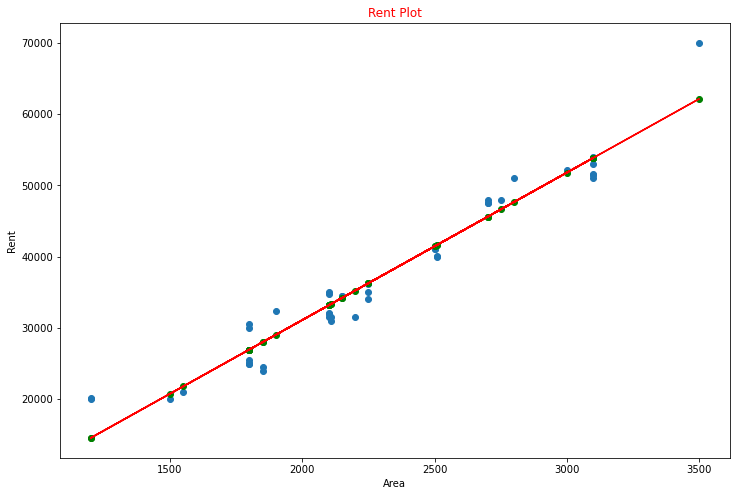

In [46]:
plt.figure(figsize=(12,8))
plt.xlabel('Area',color='black')
plt.ylabel('Rent')
plt.title('Rent Plot', color='red')
plt.plot(xtrain, reg.predict(xtrain), color='red')
plt.scatter(xtrain, ytrain)
plt.scatter(xtrain, reg.predict(xtrain), color='green')

In [47]:
reg.predict([[2500]])

array([41440.9361076])

In [48]:
reg.score(xtest, ytest)

0.9519698002632335